# Análise de Dados - League Of Legends

##### Projeto desenvolvido para estudo estatístico.
* Estudos de correlação, regressão linear, frequência e proporção

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
class DataProcessor:
    def __init__(self, data):
        self.data = data
    
    def get_numeric_data(self):
        numeric_data = self.data.select_dtypes(include=['number'])
        return numeric_data
    
    def get_string_data(self):
        string_data = self.data.select_dtypes(include=['object'])
        return string_data

### Leitura do Dataset, tratamento de valores nulos e colunas

In [6]:
# Leitura e renomeação de colunas.
path = "data/LOL.csv"
df = pd.read_csv(path)
df.rename(columns={'Attack_Demage': 'Attack_Damage'}, inplace=True)

In [7]:
df

,ID,Champion_Name,Primary_Role,Primary_Location,Health,Mana,Health_Regen,Mana_Regen,Attack_Damage,Armor,Magic_Resistance,Attack_Speed,Movement_Speed,Range
0,0,Aatrox,Fighter,Top,650,0,3.0,0,60,38,32,65,345,175
1,1,Ahri,Mage,Mid,570,418,2.0,8,53,18,30,66,330,550
2,2,Akali,Assassin,Mid,570,200,9.0,0,62,23,37,62,345,125
3,3,Akshan,Marksman,Mid,630,350,4.0,7,52,26,30,63,330,500
4,4,Alistar,Tank,Support,670,350,8.0,8,62,44,32,62,330,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,158,Zeri,Marksman,bottom,600,250,3.0,8,50,20,30,66,325,500
157,159,Ziggs,Mage,Mid,606,480,6.0,8,54,22,30,62,325,550
158,160,Zilean,Support,Support,574,452,5.0,8,52,24,30,62,335,550
159,161,Zoe,Mage,Mid,630,425,6.0,6,58,21,30,62,340,550


In [152]:
# Printando todas as colunas e a quantidade de valores nulos.
print("Colunas do Dataset e suas quantidades de valores nulos:")
print(df.isnull().sum())
print("\n---------------------------\n")
print("Coluna Primary_Location possui dois valores iguais escrito de forma diferente: ")
print(df["Primary_Location"].unique())

Colunas do Dataset e suas quantidades de valores nulos:
ID                  0
Champion_Name       0
Primary_Role        0
Primary_Location    0
Health              0
Mana                0
Health_Regen        1
Mana_Regen          0
Attack_Damage       0
Armor               0
Magic_Resistance    0
Attack_Speed        0
Movement_Speed      0
Range               0
dtype: int64

---------------------------

Coluna Primary_Location possui dois valores iguais escrito de forma diferente: 
['Top' 'Mid' 'Support' 'Jungle' 'bottom' 'Bottom']


In [153]:
# Tratando a coluna "Health_Regen" com a mediana agrupando por Primary_Role e Primary_Location
df["Health_Regen"] = df.groupby(["Primary_Role","Primary_Location"])["Health_Regen"].transform(lambda x: x.fillna(x.median()))

# Tratando os valores das colunas do tipo object capitalize
text_columns = df.select_dtypes(include=['object']).columns
df[text_columns] = df[text_columns].apply(lambda x: x.str.capitalize())

### Informações do Dataset

In [154]:
print(f"O dataset possui {len(df)} linhas e {len(df.columns)} colunas.")
print(f"As colunas e seus tipos são: \n{df.dtypes}") 

O dataset possui 161 linhas e 14 colunas.
As colunas e seus tipos são: 
ID                    int64
Champion_Name        object
Primary_Role         object
Primary_Location     object
Health                int64
Mana                  int64
Health_Regen        float64
Mana_Regen            int64
Attack_Damage         int64
Armor                 int64
Magic_Resistance      int64
Attack_Speed          int64
Movement_Speed        int64
Range                 int64
dtype: object


In [155]:
desc_stats = df.describe()
print(desc_stats)

               ID      Health        Mana  Health_Regen  Mana_Regen  \
count  161.000000  161.000000  161.000000    161.000000  161.000000   
mean    81.136646  621.788820  310.608696      6.680124    5.136646   
std     47.469661   39.391689  123.053300      5.748791    2.866829   
min      0.000000  410.000000    0.000000      1.000000    0.000000   
25%     40.000000  600.000000  280.000000      5.000000    4.000000   
50%     82.000000  630.000000  330.000000      6.000000    6.000000   
75%    122.000000  650.000000  375.000000      8.000000    8.000000   
max    162.000000  696.000000  500.000000     55.000000    9.000000   

       Attack_Damage       Armor  Magic_Resistance  Attack_Speed  \
count     161.000000  161.000000        161.000000    161.000000   
mean       59.068323   29.683230         32.708075     64.565217   
std         5.833228    6.591114         22.927505      3.936659   
min        40.000000   17.000000         22.000000     47.000000   
25%        55.000000

### Correlação

###### Algumas conclusões podem ser tiradas:
<b>1º - Correlação positiva:</b> <br>
<ul>
<li><b>Health</b> e <b>Armor</b> têm uma correlação positiva significativa de aproximadamente 0.43, o que indica que campeões com maior <b>Health</b> tendem a ter também maior <b>Armor</b>.</li>
<li><b>Health</b> e <b>Movement_Speed</b> também têm uma correlação positiva de cerca de 0.46, o que significa que campeões com maior <b>Health</b> tendem a ter uma maior <b>Movement_Speed</b>.</li>
</ul>
<b>2º - Correlação negativa:</b> <br>
<ul>
<li><b>Health</b> e <b>Range</b> apresentam uma correlação negativa de aproximadamente -0.46, indicando que campeões com maior <b>Health</b> tendem a ter menor <b>Range</b>.</li>
<li><b>Attack_Damage</b> e <b>Range</b> apresentam uma correlação negativa de aproximadamente -0.64, isso significa que há uma tendência de que campeões com maior dano de ataque possuam um alcance menor em seus ataques.</li>
</ul>

In [157]:
data = DataProcessor(df)
df_non_numeric = data.get_numeric_data()
df_non_numeric.drop("ID", axis = 1, inplace = True)
corr_matrix = df_non_numeric.corr()
print(round(corr_matrix, 2))

                  Health  Mana  Health_Regen  Mana_Regen  Attack_Damage  \
Health              1.00 -0.24          0.16       -0.09           0.39   
Mana               -0.24  1.00          0.05        0.71          -0.36   
Health_Regen        0.16  0.05          1.00        0.08           0.03   
Mana_Regen         -0.09  0.71          0.08        1.00          -0.21   
Attack_Damage       0.39 -0.36          0.03       -0.21           1.00   
Armor               0.43 -0.39          0.15       -0.30           0.55   
Magic_Resistance    0.06 -0.01          0.02        0.01           0.06   
Attack_Speed        0.16 -0.27         -0.07       -0.23           0.19   
Movement_Speed      0.46 -0.21          0.08       -0.14           0.42   
Range              -0.46  0.43         -0.07        0.27          -0.64   

                  Armor  Magic_Resistance  Attack_Speed  Movement_Speed  Range  
Health             0.43              0.06          0.16            0.46  -0.46  
Mana        

### Regressão linear
<b> Gráfico de regressão: </b> <br>
O gráfico de regressão linear nos fornece uma visão inicial da relação entre Attack_Damage e Health no dataset.
É possível notar uma alta dispersão. Os pontos estão dispersos em torno da linha de regressão, o que indica uma variabilidade considerável na relação entre as variáveis. Isso significa que, embora haja uma tendência positiva, existem outros fatores que influenciam a saúde dos campeões além do dano de ataque.

<b>Regressão linear com scikit-learn: </b> <br>
O objetivo é entender a relação entre as variáveis e fazer previsões de Health com base nos valores das variáveis independentes (Attack_Damage, Armor, Magic_Resistance).
Para cada unidade de aumento em Attack_Damage, espera-se um aumento de 1.48321745 unidades em Health, mantendo as outras variáveis constantes. Da mesma forma, para cada unidade de aumento em Armor, espera-se um aumento de 1.8376597 unidades em Health, e para cada unidade de aumento em Magic_Resistance, espera-se um aumento de 0.02692727 unidades em Health.

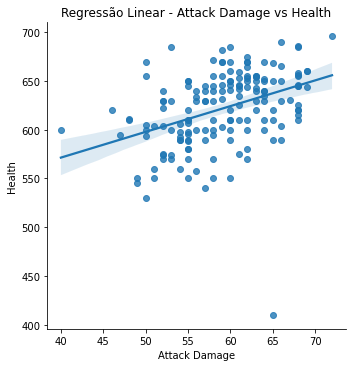

In [158]:
sns.lmplot(x='Attack_Damage', y='Health', data=df)

plt.title('Regressão Linear - Attack Damage vs Health')
plt.xlabel('Attack Damage')
plt.ylabel('Health')

plt.show()

In [159]:
x = df[['Attack_Damage', 'Armor', 'Magic_Resistance']]
y = df['Health']

reg = LinearRegression()
reg.fit(x, y)

coefficients = reg.coef_
intercept = reg.intercept_
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [1.48321745 1.8376597  0.02692727]
Intercept: 478.7492380297252


### Análise de frequência e proporção

Role Counts: 
Fighter     43
Mage        35
Marksman    27
Tank        22
Assassin    18
Support     16
Name: Primary_Role, dtype: int64

Location Counts:
Top        40
Mid        38
Jungle     33
Support    29
Bottom     21
Name: Primary_Location, dtype: int64

Role Proportions:
Fighter     26.71%
Mage        21.74%
Marksman    16.77%
Tank        13.66%
Assassin    11.18%
Support      9.94%
Name: Primary_Role, dtype: object

Location Proportions:
Top        24.84%
Mid         23.6%
Jungle      20.5%
Support    18.01%
Bottom     13.04%
Name: Primary_Location, dtype: object


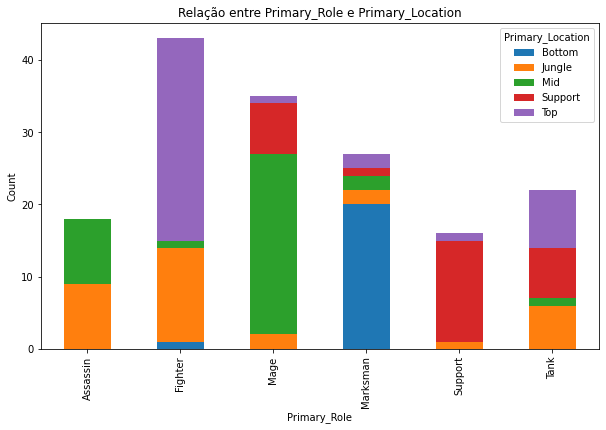

In [160]:
role_counts = df['Primary_Role'].value_counts()
location_counts = df['Primary_Location'].value_counts()

role_proportions = df['Primary_Role'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
location_proportions = df['Primary_Location'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

print(f'Role Counts: \n{role_counts}')
print(f'\nLocation Counts:\n{location_counts}')
print(f'\nRole Proportions:\n{role_proportions}')
print(f'\nLocation Proportions:\n{location_proportions}')

# Criação de uma tabela cruzada entre Primary_Role e Primary_Location
cross_tab = pd.crosstab(df['Primary_Role'], df['Primary_Location'])

cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relação entre Primary_Role e Primary_Location')
plt.xlabel('Primary_Role')
plt.ylabel('Count')
plt.legend(title='Primary_Location')
plt.show()